In [3]:
VERSION

v"0.3.6"

In [4]:
round(Int64, 1.1)

1

In [1]:
addprocs(8)

8-element Array{Any,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [2]:
workers()

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [3]:
push!(LOAD_PATH,"./src/")
@everywhere begin
    import nbody
    reload("nbody")
    nb = nbody;
end

In [4]:
N = 8192
stepc = 120
sim = nb.Simulation(nb.worldspherical(N, smth=5.1, opening_alpha=0.5, space=nb.Cosmological, scale=210.,
Ω0=0.7, ΩΛ=0.3),
limit_by_steps=false, stepc=36, ti=0.02, tf=0.1, n_test_particle=0);
#nb.set_zeldovich!(sim, false)
nb.save_G2(sim.w, "/home/skariel/Desktop/Gadget-2.0.7/Gadget2/compare.ic", sim.ti)
# now run Gadget2 simulation...

In [5]:
nb.exec!(sim, false; silent=false)

s=1 t=0.02 dt=0.0015595468928510951 /0.390246659s
s=2 t=0.021559546892851094 dt=0.0015466212227017813 /0.063585079s
s=3 t=0.023106168115552873 dt=0.0014614090801519347 /0.057982092s
s=4 t=0.02456757719570481 dt=0.0014083551085610506 /0.054748281s
s=5 t=0.02597593230426586 dt=0.0014594186468075206 /0.05961667s
s=6 t=0.02743535095107338 dt=0.001472479827169435 /0.056559745s
s=7 t=0.028907830778242816 dt=0.0014406058017575722 /0.085987832s
s=8 t=0.03034843658000039 dt=0.0014518881309283935 /0.06431194s
s=9 t=0.031800324710928786 dt=0.0014219013486263228 /0.053494864s
s=10 t=0.03322222605955511 dt=0.0014042484433845418 /0.053892478s
s=11 t=0.03462647450293966 dt=0.0013941582667244094 /0.053934077s
s=12 t=0.03602063276966407 dt=0.0013948337790772077 /0.057143682s
s=13 t=0.037415466548741276 dt=0.0014500199360570059 /0.054052399s
s=14 t=0.03886548648479828 dt=0.0014694873124723178 /0.073485241s
s=15 t=0.0403349737972706 dt=0.0015009787108376767 /0.060948005s
s=16 t=0.04183595250810828 dt=0.0

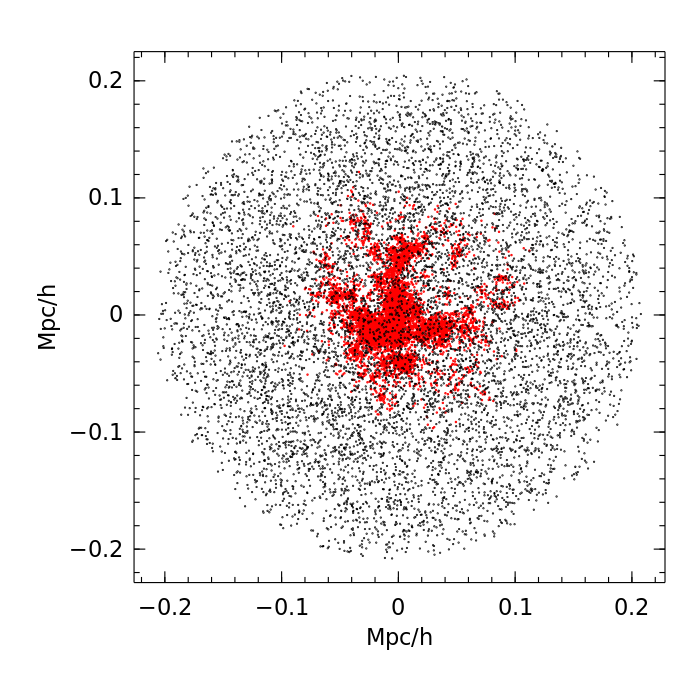

In [6]:
using Winston
Winston.set_default_plot_size(700,700)
nb.plot(sim,s1=0.07,s2=.05)

n => {0,8192,0,0,0,0}
m => [0.0,0.0001220703125,0.0,0.0,0.0,0.0]
t = read(f,Float64) => 0.10000000000000002
z = read(f,Float64) => 8.999999999999998
z => 8.999999999999998
t => 0.10000000000000002


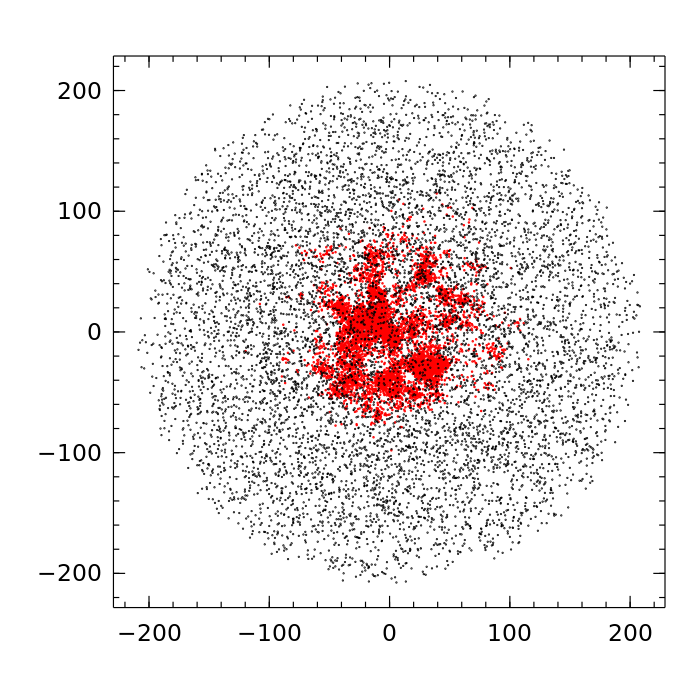

In [14]:
# now plot!
wl = nb.load_G2("/home/skariel/Desktop/Gadget-2.0.7/Gadget2/compare_output/snapshot_004");
Winston.set_default_plot_size(700,700)
nb.plot(sim, wl,s1=0.07,s2=.05)

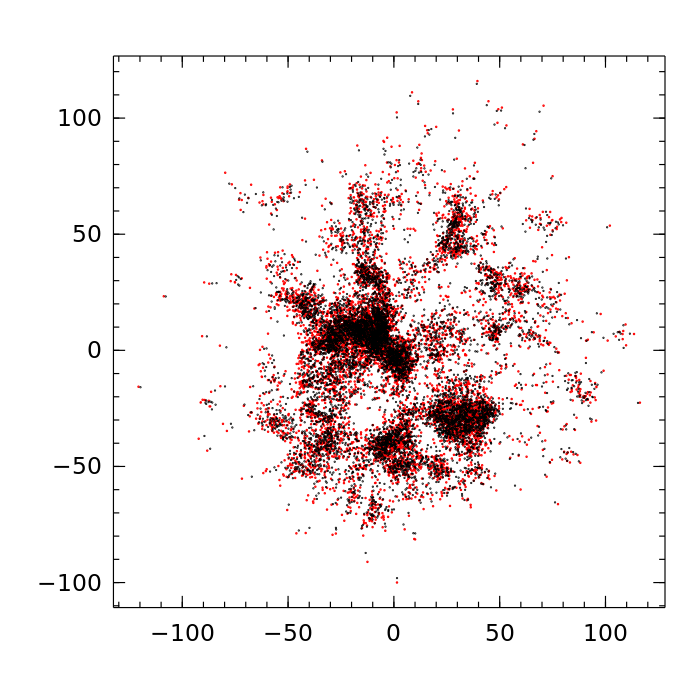

In [15]:
nb.plot(sim.w, wl, s1=0.07, s2=0.05)

In [16]:
mean(abs(sim.w.vx))

3.4153489105728916

In [17]:
mean(abs(wl.vx))

3.5269834797173543

#OPTIMIZE!

In [1]:
workers()

1-element Array{Int64,1}:
 1

In [2]:
addprocs(8)
@everywhere begin
    push!(LOAD_PATH,"./src/")
    import nbody
    reload("nbody")
    nb = nbody;
end

In [3]:
workers()

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

(215^3 / 2048)^(1 / 3) => 16.930189107962356
s=1 t=0.04 dt=0.004266304711649546 /0.28600537s
s=2 t=0.044266304711649544 dt=0.004686700887656061 /0.017346493s
s=3 t=0.048953005599305606 dt=0.005083128310275261 /0.012844733s
s=4 t=0.05403613390958086 dt=0.005445505966843151 /0.012921777s
s=5 t=0.05948163987642401 dt=0.005757063489465023 /0.014849903s
s=6 t=0.06523870336588904 dt=0.006043964976610764 /0.039936252s
s=7 t=0.07128266834249981 dt=0.006030074099317198 /0.015477467s
s=8 t=0.077312742441817 dt=0.0059649535410800725 /0.014886645s
s=9 t=0.08327769598289707 dt=0.005940069571178607 /0.015280259s
s=10 t=0.08921776555407566 dt=0.006211794646162914 /0.015007535s
s=11 t=0.09542956020023859 dt=0.006984980774922654 /0.015760578s
s=12 t=0.10241454097516124 dt=0.006832172782488413 /0.014877815s
s=13 t=0.10924671375764965 dt=0.00671854050368501 /0.013640405s
s=14 t=0.11596525426133465 dt=0.006854142934475801 /0.013210853s
s=15 t=0.12281939719581046 dt=0.006975950766385382 /0.012378336s
s=16 

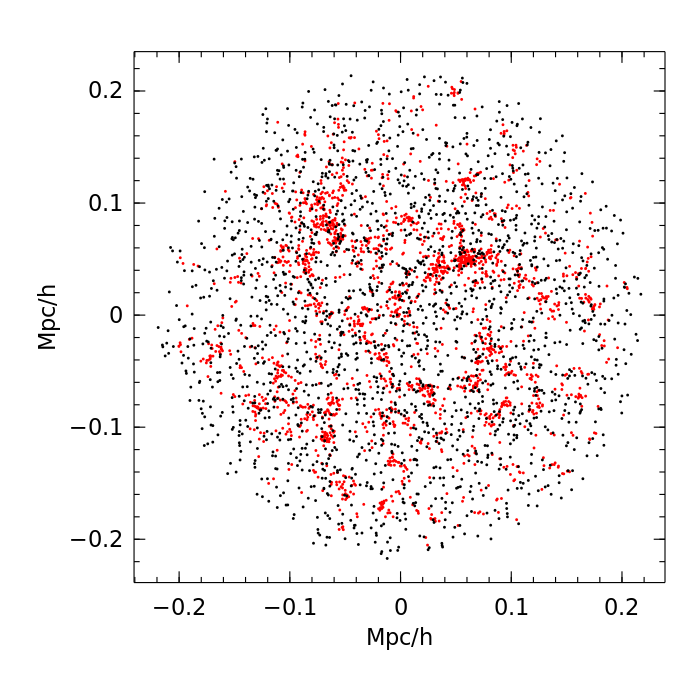

In [4]:
N = 2048

@show (215^3/2048)^(1/3)

sim = nb.Simulation(nb.worldspherical(N, smth=8.1, opening_alpha=0.5, space=nb.Cosmological, scale=221.,
Ω0=0.7, ΩΛ=0.3),
limit_by_steps=false, stepc=36, ti=0.04, tf=0.3, n_test_particle=3*N);

nb.exec!(sim,false,silent=false)
Winston.set_default_plot_size(700,700)
nb.plot(sim,s1=0.1,s2=0.1)

In [5]:
# initial simulaiton
N = 2048
sim = nb.Simulation(nb.worldspherical(N, smth=8.1, opening_alpha=0.5, space=nb.Cosmological, scale=221.,
Ω0=0.7, ΩΛ=0.3),
limit_by_steps=false, stepc=36, ti=0.04, tf=0.3, n_test_particle=3*N);

# evolve!
nb.exec!(sim, false, silent=true)

# set new ICs and remember the old
real_xi = [x for x in sim.xi]
real_yi = [y for y in sim.yi]
real_zi = [z for z in sim.zi]
real_x0 = [p._x for p in sim.w.particles]
real_y0 = [p._y for p in sim.w.particles]
real_z0 = [p._z for p in sim.w.particles]

for i in 1:N
    sim.xi[i] = real_x0[i]
    sim.yi[i] = real_y0[i]
    sim.zi[i] = real_z0[i]
end
opt = nb.Optimization(sim);

In [ ]:
step=0
for l_target_t in linspace(log(0.3), log(0.04), 200)    
    step+=1
    target_t = exp(l_target_t)
    println("----------------------- ti=",target_t," comp: ",step/200*100)
    sim.ti = target_t
    nb.optimize(opt, 13, 1400)
end

----------------------- ti=0.29999999999999993 comp: 0.5
step=1 grade=0.0 f=0.5
----------------------- ti=0.2969777837598394 comp: 1.0
step=1 grade=9.50660786626262e-5 f=0.5
----------------------- ti=0.2939860134896864 comp: 1.5
step=1 grade=0.0015255650058687278 f=0.5
----------------------- ti=0.291024382475191 comp: 2.0
step=1 grade=0.007746029420434017 f=0.5
----------------------- ti=0.28809258709186036 comp: 2.5
step=1 grade=0.02436573856965514 f=0.5
----------------------- ti=0.2851903267739306 comp: 3.0
step=1 grade=0.059375461366813875 f=0.5
----------------------- ti=0.28231730398355437 comp: 3.5000000000000004
step=1 grade=0.12309117073304815 f=0.5
----------------------- ti=0.27947322418029624 comp: 4.0
step=1 grade=0.22837705467150143 f=0.5
----------------------- ti=0.27665779579093713 comp: 4.5
step=1 grade=0.39040010613504794 f=0.5
----------------------- ti=0.2738707301795824 comp: 5.0
step=1 grade=0.6268694016244272 f=0.5
----------------------- ti=0.271111741618071

In [ ]:
nb.optimize(opt, 13, 300)


s=1 t=0.04000000000000001 dt=0.0059745418586115455 /0.01274526s
s=2 t=0.04597454185861155 dt=0.006409692086913114 /0.012680014s
s=3 t=0.05238423394552466 dt=0.00687065264255251 /0.014626159s
s=4 t=0.05925488658807718 dt=0.007330638649117332 /0.013101382s
s=5 t=0.06658552523719452 dt=0.007765339473735806 /0.01153462s
s=6 t=0.07435086471093033 dt=0.008227239436833941 /0.011045818s
s=7 t=0.08257810414776429 dt=0.008627184245828003 /0.011503335s
s=8 t=0.0912052883935923 dt=0.00903837510077488 /0.01368532s
s=9 t=0.10024366349436717 dt=0.009408920411936573 /0.012597572s
s=10 t=0.10965258390630375 dt=0.009754893110651296 /0.01357596s
s=11 t=0.11940747701695506 dt=0.01008627194103024 /0.01200391s
s=12 t=0.1294937489579853 dt=0.010389853532939253 /0.011894921s
s=13 t=0.13988360249092455 dt=0.010636049608159963 /0.012628997s
s=14 t=0.1505196520990845 dt=0.010838852398803344 /0.011319522s
s=15 t=0.16135850449788783 dt=0.010994111498476525 /0.043022917s
s=16 t=0.17235261599636434 dt=0.011042594073

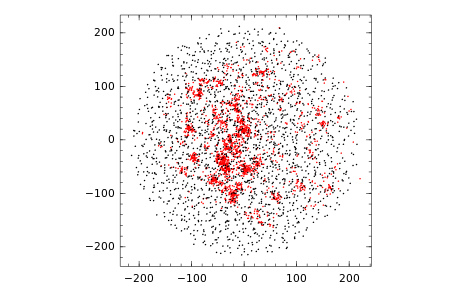

In [8]:
nb.exec!(sim,false)
nb.plot(sim)

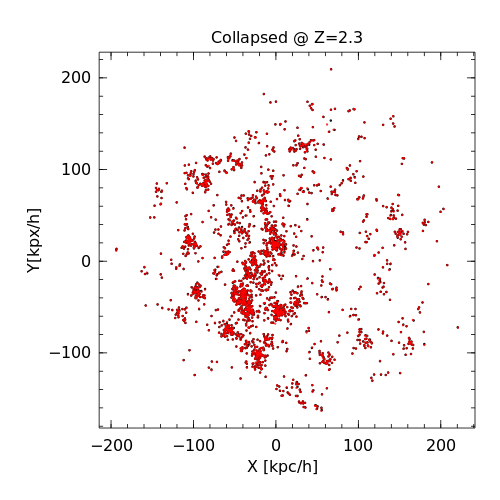

In [9]:
using Winston
Winston.set_default_plot_size(500,500)
hold(false)
p1 = scatter(real_x0, real_y0, 0.1, aspect_ratio=1, color="black")
hold(true)
scatter([p._x for p in sim.w.particles], [p._y for p in sim.w.particles], 0.07, aspect_ratio=1, color="red")
title("Collapsed @ Z=2.3")
xlabel("X [kpc/h]")
ylabel("Y[kpx/h]")

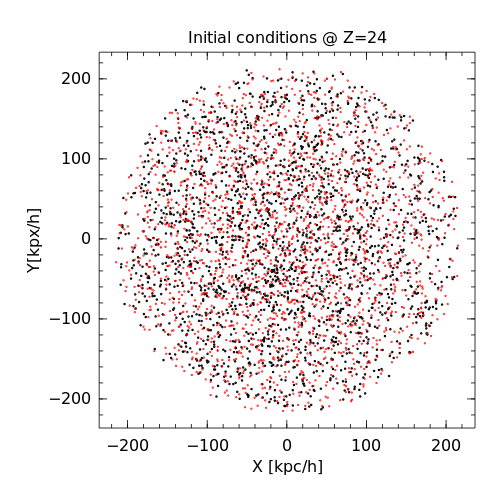

In [10]:
using Winston
Winston.set_default_plot_size(500,500)
hold(false)
p2 = scatter(real_xi, real_yi, 0.1, aspect_ratio=1, color="black")
hold(true)
scatter(sim.xi, sim.yi, 0.07, aspect_ratio=1, color="red")
title("Initial conditions @ Z=24")
xlabel("X [kpc/h]")
ylabel("Y[kpx/h]")

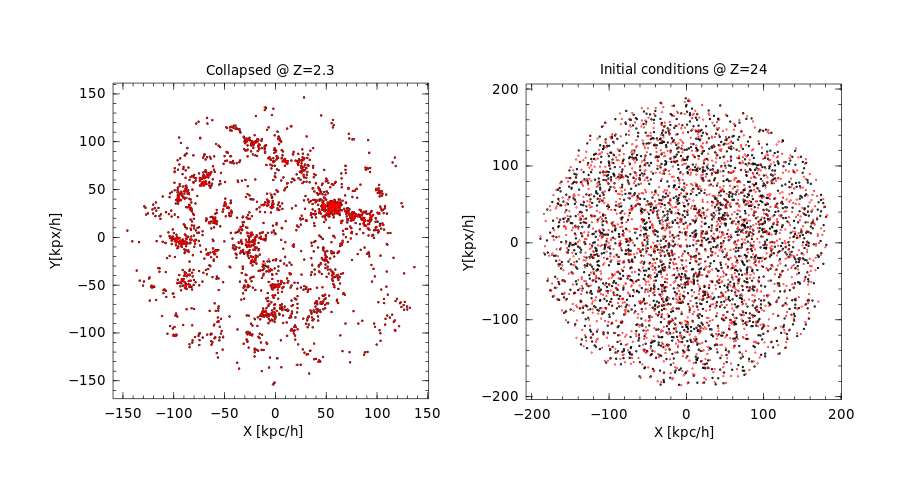

In [47]:
Winston.set_default_plot_size(900,500)
t=Table(1,2)
t[1,1]=p1
t[1,2]=p2
t

In [39]:
32*32*32

32768

In [75]:
addprocs(8)

8-element Array{Any,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [76]:
@everywhere begin
    push!(LOAD_PATH,"./src/")
    import nbody
    reload("nbody")
    nb = nbody;
end
w = nb.load_G2("/home/skariel/Desktop/N-GenIC/ICs/ics");

n => {0,2097152,0,0,0,0}
m => [0.0,13.797581509782903,0.0,0.0,0.0,0.0]
z => 30.0
t => 0.03225806451612903


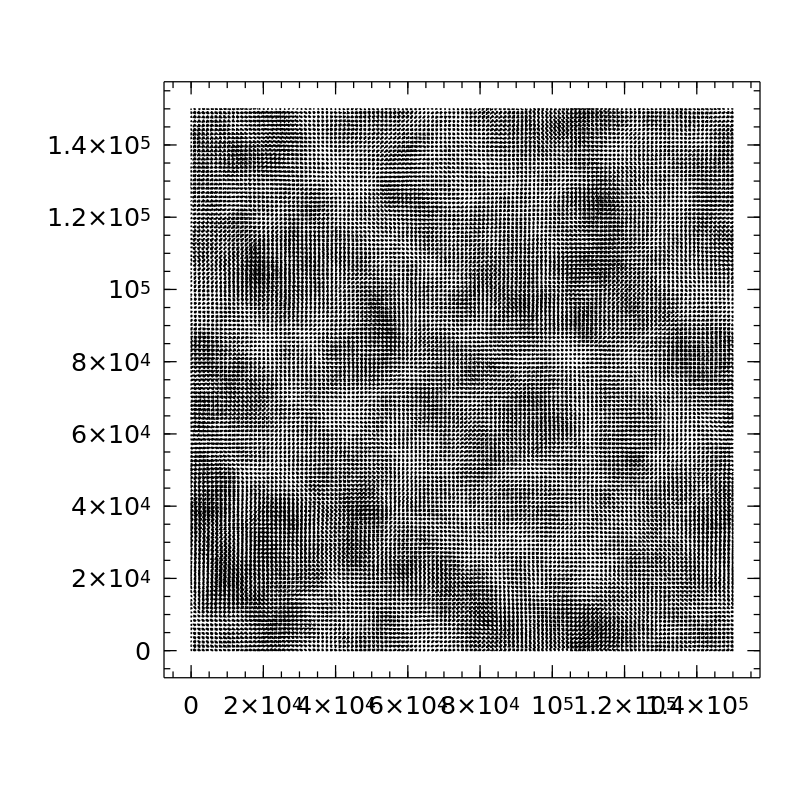

In [77]:
using Winston
hold(false)
Winston.set_default_plot_size(800,800)
nb.plot(w)

In [98]:
nw = nb.filter_r(w, 20000.);

smth = sqrt(w.smth2) => 0.2
opening_alpha = sqrt(w.opening_alpha2) => 0.5
dtfrac = w.dtfrac => 0.35
space = typeof(w.space) => Cosmological
Ω0 = w.Ω0 => 0.3089
ΩΛ = w.ΩΛ => 0.6911


nw.n => 21638


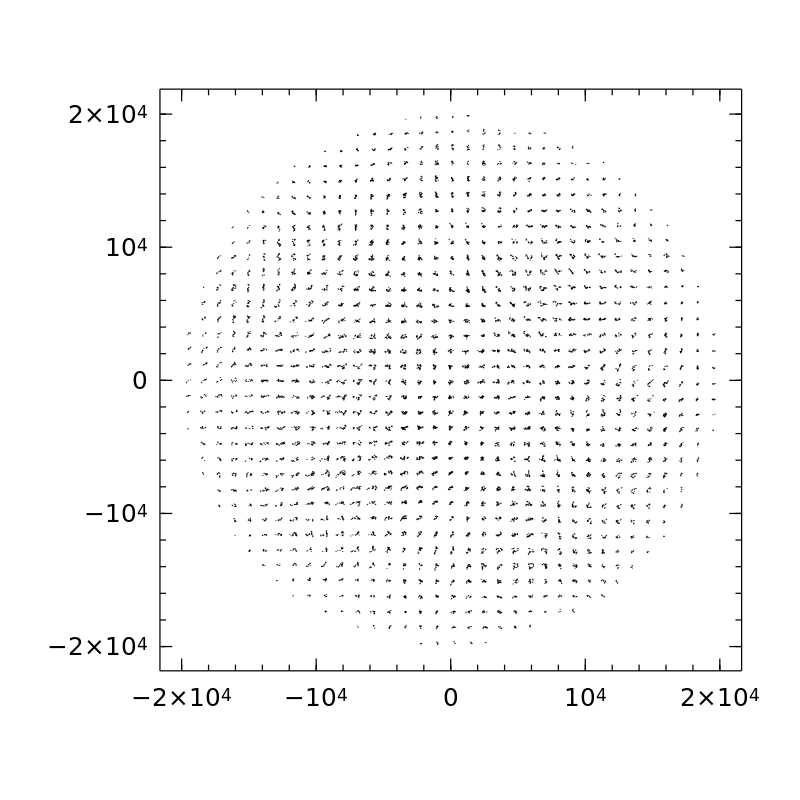

In [99]:
@show nw.n
nb.plot(nw)

In [100]:
nw.opening_alpha2 = 0.5
nw.smth2 = 300.0^2

90000.0

In [101]:
sim = nb.Simulation(nw, limit_by_steps=false, stepc=36, ti=0.0322581, tf=0.7, n_test_particle=128);

In [102]:
mean(abs(nw.vx))

1.9840932177385393

In [103]:
mean(abs(w.vx))

1.9127846763744005

In [95]:
for i in 1:nw.n
    sim.vxi[i] = w.vx[i]
    sim.vyi[i] = w.vy[i]
    sim.vzi[i] = w.vz[i]
end

In [104]:
nb.exec!(sim, false)

resetting!
s=1 t=0.0322581 dt=0.013362388977668897 /0.11274637s
s=2 t=0.04562048897766889 dt=0.01582189556711376 /0.082353313s
s=3 t=0.06144238454478265 dt=0.01808213293027296 /0.097706477s
s=4 t=0.07952451747505562 dt=0.019768751061687483 /0.185064152s
s=5 t=0.09929326853674311 dt=0.020496956239439666 /0.099699175s
s=6 t=0.11979022477618279 dt=0.019966606546969152 /0.089767304s
s=7 t=0.13975683132315192 dt=0.019688098573102285 /0.092030574s
s=8 t=0.1594449298962542 dt=0.02023861431148101 /0.093462686s
s=9 t=0.1796835442077352 dt=0.01782049727678908 /0.098882909s
s=10 t=0.19750404148452427 dt=0.016854514083502206 /0.100099501s
s=11 t=0.21435855556802647 dt=0.016425044923225808 /0.136787162s
s=12 t=0.2307836004912523 dt=0.01615194782020437 /0.104872147s
s=13 t=0.24693554831145664 dt=0.016140747903660144 /0.10127106s
s=14 t=0.2630762962151168 dt=0.01680676285446115 /0.151466073s
s=15 t=0.27988305906957794 dt=0.01641788763145355 /0.093688802s
s=16 t=0.2963009467010315 dt=0.015735544163744

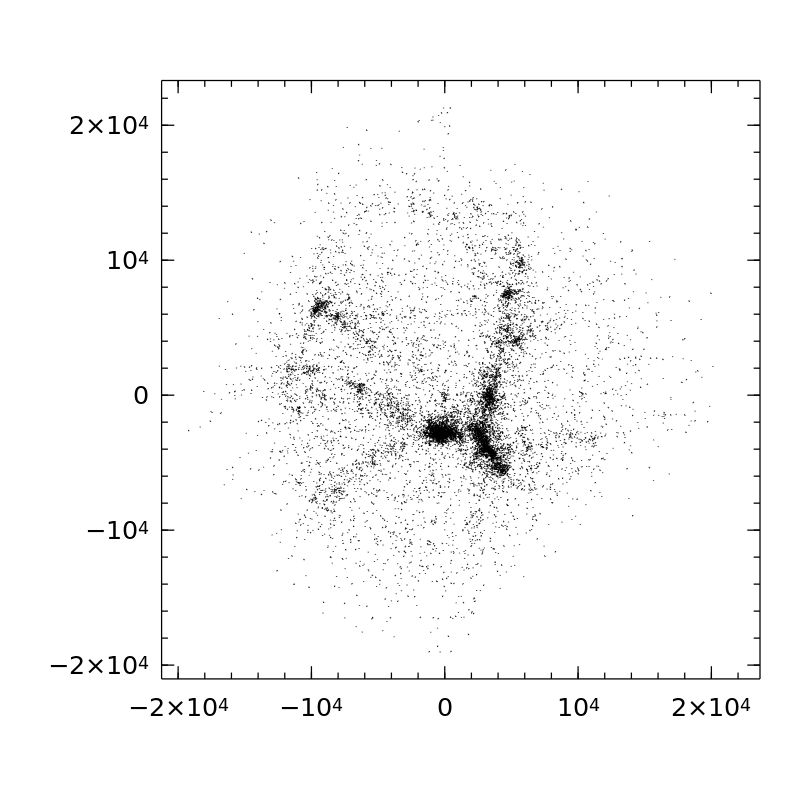

In [105]:
nb.plot(sim.w)

#Some testing of Zeldovich

In [44]:
@everywhere begin
    push!(LOAD_PATH,"./src/")
    import nbody
    reload("nbody")
    nb = nbody;
end
using Winston

w = nb.load_G2("/home/skariel/Desktop/N-GenIC/ICs/ics")

nw = nb.filter_r(w, 20000.)
nw.smth2=0.05^2
nw.opening_alpha2=0.05
@show mean(nw.vx)
sim = nb.Simulation(nw, limit_by_steps=false, stepc=36, ti=0.0322581, tf=0.9, n_test_particle=128);

vx1 = deepcopy(sim.w.vx.s)
nb.set_zeldovich!(sim, false)
vx2 = deepcopy(sim.w.vx.s);

n => {0,2097152,0,0,0,0}
m => [0.0,4.088172299194934,0.0,0.0,0.0,0.0]
z => 30.0
t => 0.03225806451612903
smth = sqrt(w.smth2) => 0.2
opening_alpha = sqrt(w.opening_alpha2) => 0.5
dtfrac = w.dtfrac => 0.35
space = typeof(w.space) => Cosmological
Ω0 = w.Ω0 => 0.3089
ΩΛ = w.ΩΛ => 0.6911
mean(nw.vx) => 0.0


In [45]:
std(vx1)

2.624912899728883

In [46]:
std(vx2)

1.7386394469811932

In [47]:
vx1[1001]

5.170440889261885

In [48]:
vx2[1001]

3.4042928836181154

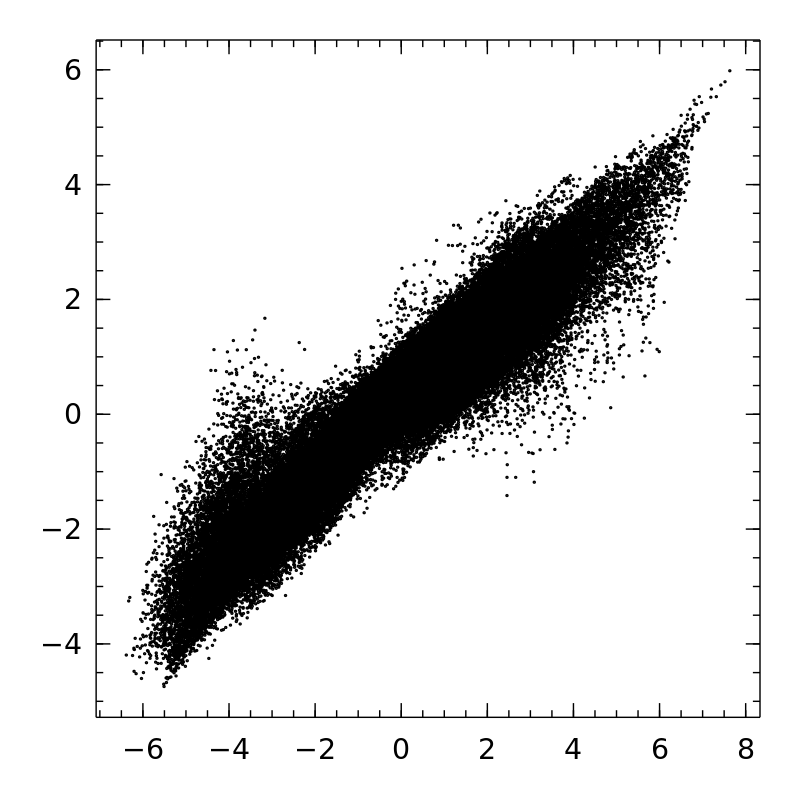

In [49]:
scatter(vx1,vx2,0.1)
hold(true)
p=plot([-5,-5],[5,5],"-k")
hold(false)
p

In [30]:
mean(vx1)

0.21191409874319714

In [31]:
mean(vx2)

0.03341927287506571

In [35]:
nb.Ha(sim.ti, sim.w)

9.593279226633165

In [50]:
a(t) = t^(2/3)

a (generic function with 1 method)

In [51]:
ad(t) = 2*3*t^(-1/3)

ad (generic function with 1 method)

In [53]:
add(t) = -2/9*t^(-4/3)

add (generic function with 1 method)

In [54]:
a(0.01)

0.046415888336127795

In [55]:
ad(0.01)

27.84953300167667

In [56]:
add(0.01)

-103.14641852472838

In [57]:
ad(0.01)/a(0.01)

599.9999999999998

In [61]:
H(t) = ad(t)/a(t)

H (generic function with 1 method)

In [62]:
H(0.01)*ad(0.01)

16709.719801005995

In [63]:
H(0.01)

599.9999999999998

In [64]:
add(0.01)

-103.14641852472838

In [68]:
H(0.05)*ad(0.05)

1954.3806839483325

In [69]:
add(0.05)

-12.064078295977358